In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('data/dataset.csv')

In [18]:
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [19]:
df['Result'].unique()

array([-1,  1], dtype=int64)

In [20]:
df.shape

(11055, 32)

D:\Coding Stuff\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result', ylabel='count'>

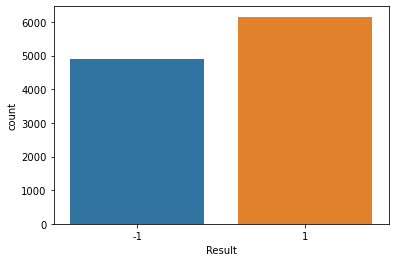

In [21]:
import seaborn as sns
sns.countplot(df['Result'])

In [22]:
#Unique values for each columns
col=df.columns
for i in col:
     if  i!='index':
        print(i,df[i].unique())

having_IPhaving_IP_Address [-1  1]
URLURL_Length [ 1  0 -1]
Shortining_Service [ 1 -1]
having_At_Symbol [ 1 -1]
double_slash_redirecting [-1  1]
Prefix_Suffix [-1  1]
having_Sub_Domain [-1  0  1]
SSLfinal_State [-1  1  0]
Domain_registeration_length [-1  1]
Favicon [ 1 -1]
port [ 1 -1]
HTTPS_token [-1  1]
Request_URL [ 1 -1]
URL_of_Anchor [-1  0  1]
Links_in_tags [ 1 -1  0]
SFH [-1  1  0]
Submitting_to_email [-1  1]
Abnormal_URL [-1  1]
Redirect [0 1]
on_mouseover [ 1 -1]
RightClick [ 1 -1]
popUpWidnow [ 1 -1]
Iframe [ 1 -1]
age_of_domain [-1  1]
DNSRecord [-1  1]
web_traffic [-1  0  1]
Page_Rank [-1  1]
Google_Index [ 1 -1]
Links_pointing_to_page [ 1  0 -1]
Statistical_report [-1  1]
Result [-1  1]


In [23]:
#Replacing -1 with 0 
df['Result']=df['Result'].replace(-1,0)

In [24]:
df.shape

(11055, 32)

In [25]:
print(df.corr()['Result'].sort_values())

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
Abnormal_URL                  -0.060488
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Redirect                      -0.020113
Iframe                        -0.003394
Favicon                       -0.000280
popUpWidnow                    0.000086
index                          0.000978
RightClick                     0.012653
Submitting_to_email            0.018249
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.052948
URLURL_Length                  0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IPhaving_IP_Address     0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229


<AxesSubplot:>

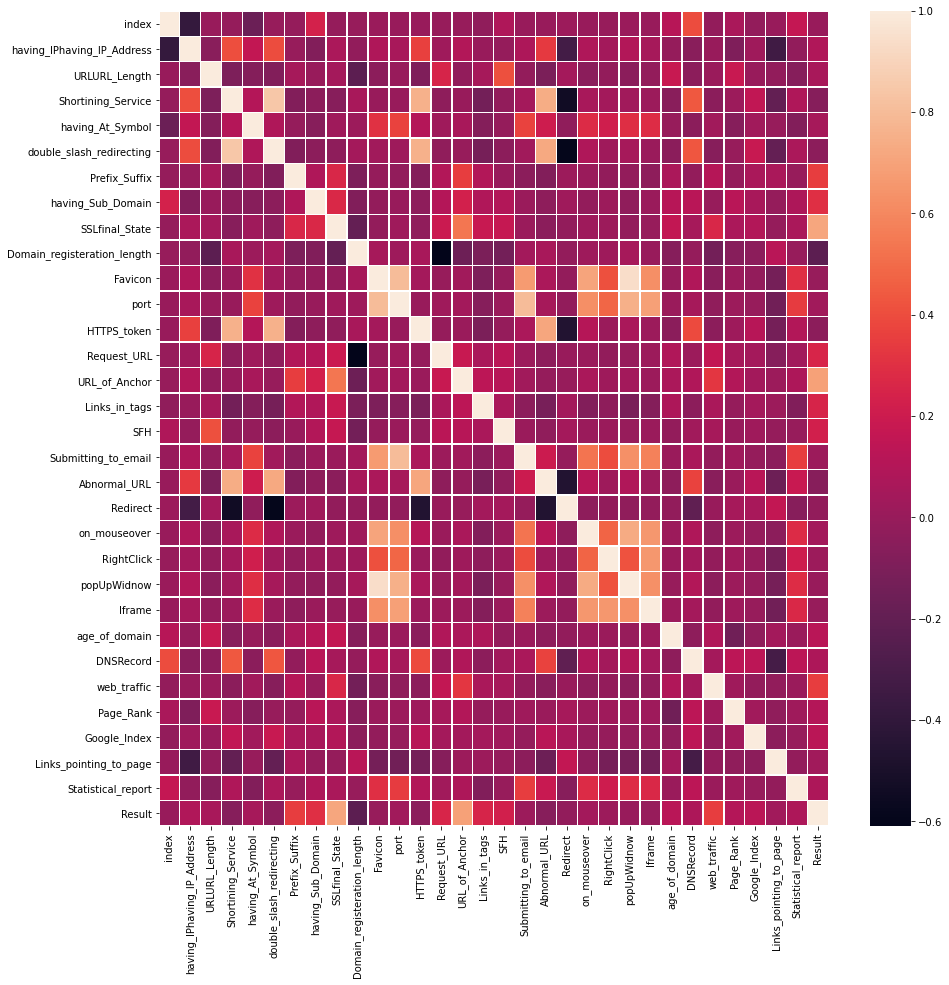

In [26]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), linewidths=.5)

In [27]:
from sklearn.model_selection import train_test_split,cross_val_score
X= df.drop(columns='Result')
Y=df['Result']
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(train_X,train_Y)
pred=lr.predict(test_X)
accuracy_score(pred,test_Y)

D:\Coding Stuff\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9207114862827857

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(train_X,train_Y)
knn_predict=knn.predict(test_X)
accuracy_score(knn_predict,test_Y)

0.622851974675912

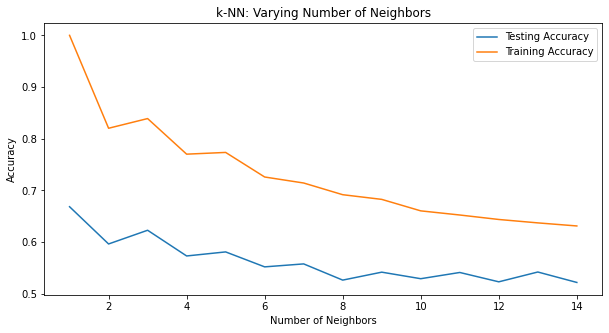

In [30]:
neighbors = np.arange(1, 15)

train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors= k )

    # Fit the classifier to the training data
    knn.fit(train_X, train_Y)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_X, train_Y)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(test_X, test_Y)

# Generate plot
plt.figure(figsize=(10,5))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [31]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(train_X, train_Y)
naive_predict=clf.predict(test_X)
accuracy_score(naive_predict,test_Y)

0.9035272836900814

In [44]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(max_depth=20, random_state=42)
forest_clf.fit(train_X,train_Y)
ran_pred=forest_clf.predict(test_X)
accuracy_score(ran_pred,test_Y)

0.9683448899608079

In [50]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(32,activation='relu',input_dim=31))
ann.add(tf.keras.layers.Dense(16,activation='relu'))
ann.add(tf.keras.layers.Dense(18,activation='relu'))
ann.add(tf.keras.layers.Dense(1,activation='sigmoid'))
ann.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
ann.fit(train_X,train_Y,epochs=100,batch_size=10)

Epoch 1/100
774/774 [==============================] - 1s 1ms/step - loss: 3.9013 - accuracy: 0.6257
Epoch 2/100
774/774 [==============================] - 1s 904us/step - loss: 1.4825 - accuracy: 0.7253
Epoch 3/100
774/774 [==============================] - 1s 924us/step - loss: 1.0022 - accuracy: 0.7747
Epoch 4/100
774/774 [==============================] - 1s 890us/step - loss: 0.8944 - accuracy: 0.8063
Epoch 5/100
774/774 [==============================] - 1s 850us/step - loss: 1.1802 - accuracy: 0.8078
Epoch 6/100
774/774 [==============================] - 1s 912us/step - loss: 0.7827 - accuracy: 0.8241
Epoch 7/100
774/774 [==============================] - 1s 935us/step - loss: 0.8048 - accuracy: 0.8193
Epoch 8/100
774/774 [==============================] - 1s 955us/step - loss: 0.5850 - accuracy: 0.8566
Epoch 9/100
774/774 [==============================] - 1s 1ms/step - loss: 0.5660 - accuracy: 0.8514
Epoch 10/100
774/774 [==============================] - 1s 1ms/step - loss: 0

In [54]:
import joblib
joblib.dump(forest_clf,'model/forest.pkl')


['models/forest.pkl']